In [1]:

import geopandas as gpd
gdf = gpd.read_file("City_Council_Districts_-_Effective_for_the_2023_Municipal_Election/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp")
print(gdf.head())

   FID    LONGNAME SHORTNAME  DISTRICT      COLOR  TOTAL  TARGET_DEV  \
0    1  District 1        D1         1 -851848832  76830        1758   
1    2  District 2        D2         2  465990528  77466        2394   
2    3  District 3        D3         3  494969216  73285       -1787   
3    4  District 4        D4         4     -65408  72917       -2155   
4    5  District 5        D5         5  412292224  75436         364   

   TARGET_D_1  TOTAL18  TOTALHISP  ...  BLACK  AIAN  ASIAN  HPI  OTHER  MLTMN  \
0        2.34    64257      24552  ...   3637   783   5080   50  20935   1689   
1        3.19    70183       6640  ...   4520   269  13604   55   4893   1005   
2       -2.38    60834      11898  ...  14990   492  13190   45   9927   5357   
3       -2.87    54939      17409  ...  40030   653   3093   44  11569   7013   
4        0.48    59652      18191  ...  35584   475   2022   42  12727   4194   

   Shape__Are  Shape__Len  DistrictTe  \
0    0.002985    0.380208           1  

In [2]:
type(gdf)
#the data type is GeoDataFrame

geopandas.geodataframe.GeoDataFrame

<Axes: >

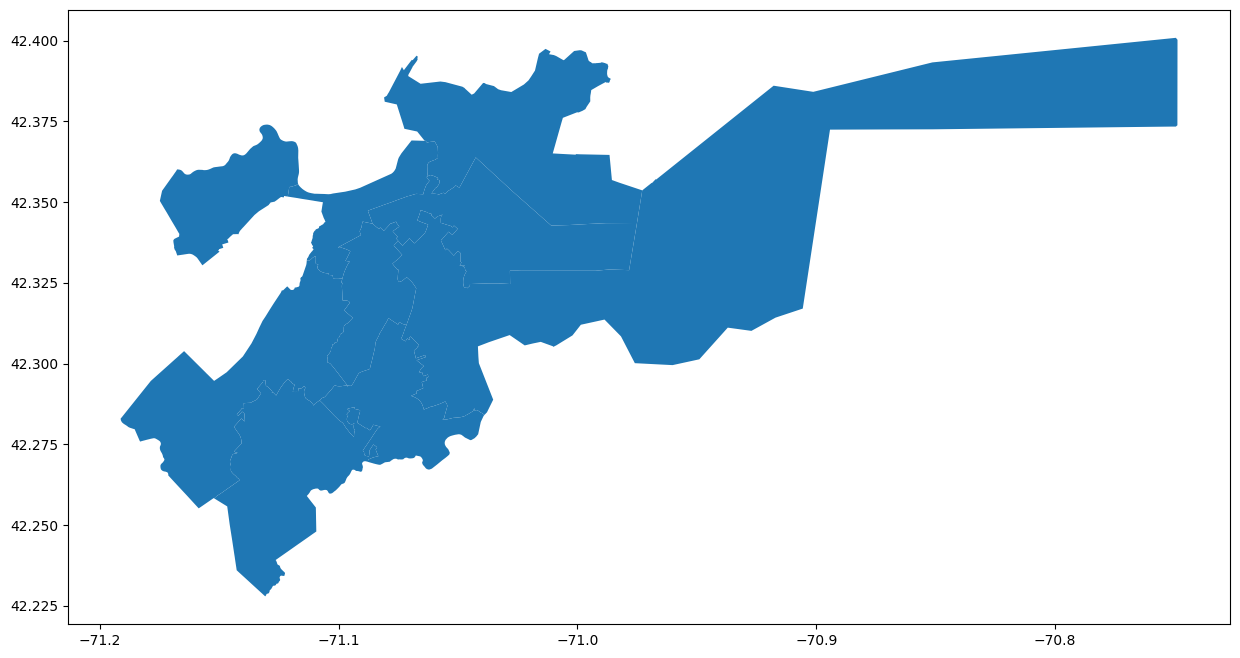

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
#gdf.plot()
fig, ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax)

In [5]:
import pandas as pd
import os

df = pd.read_csv('CrimeIncidentReports/Combined1.csv')

/var/folders/80/yfyy9v2j1y9_hwp_rl0703f40000gn/T/ipykernel_44065/836541693.py:4: DtypeWarning: Columns (1,3,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CrimeIncidentReports/Combined1.csv')


In [6]:
active_districts_df = df.loc[((df['SHOOTING'] == 1) | (df['SHOOTING'] == 'Y'))]
active_district4_df = df.loc[((df['SHOOTING'] == 1) | (df['SHOOTING'] == 'Y')) & (df['DISTRICT'].isin(['B2', 'B3', 'C11', 'E13']))]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [8]:
geometry = [Point(xy) for xy in zip(active_district4_df['Long'], active_district4_df['Lat'])]

In [9]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(active_district4_df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/opt/anaconda3/envs/CS506/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Unnamed: 0 INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
478          478      I152050036           413  Aggravated Assault   
479          479      I152050036           413  Aggravated Assault   
480          480      I152050036           413  Aggravated Assault   
1296        1296      I152050961           413  Aggravated Assault   
1328        1328      I152051161          3125     Warrant Arrests   

                 OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
478   ASSAULT - AGGRAVATED - BATTERY       B2            326        Y   
479   ASSAULT - AGGRAVATED - BATTERY       B2            326        Y   
480   ASSAULT - AGGRAVATED - BATTERY       B2            326        Y   
1296  ASSAULT - AGGRAVATED - BATTERY       B2            286        Y   
1328                  WARRANT ARREST       B2            238        Y   

         OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
478   2015-06-16 20:41:00  2015      6     Tuesday    20    Part One   
479   2015-06-16 20:41:00  2015      6     Tuesday    20    Part One   
480   2015-06-16 20:41:00  2015      6     Tuesday    20    Part One   
1296  2015-06-19 21:20:00  2015      6      Friday    21    Part One   
1328  2015-06-20 00:00:00  2015      6    Saturday     0  Part Three   

            STREET        Lat       Long                     Location  \
478   LAWRENCE AVE  42.311611 -71.076256  (42.31161123, -71.07625600)   
479   LAWRENCE AVE  42.311611 -71.076256  (42.31161123, -71.07625600)   
480   LAWRENCE AVE  42.311611 -71.076256  (42.31161123, -71.07625600)   
1296      KERR WAY  42.333584 -71.085543  (42.33358389, -71.08554259)   
1328     DUDLEY ST  42.317808 -71.066850  (42.31780762, -71.06684990)   

                        geometry  
478   POINT (-71.07626 42.31161)  
479   POINT (-71.07626 42.31161)  
480   POINT (-71.07626 42.31161)  
1296  POINT (-71.08554 42.33358)  
1328  POINT (-71.06685 42.31781)

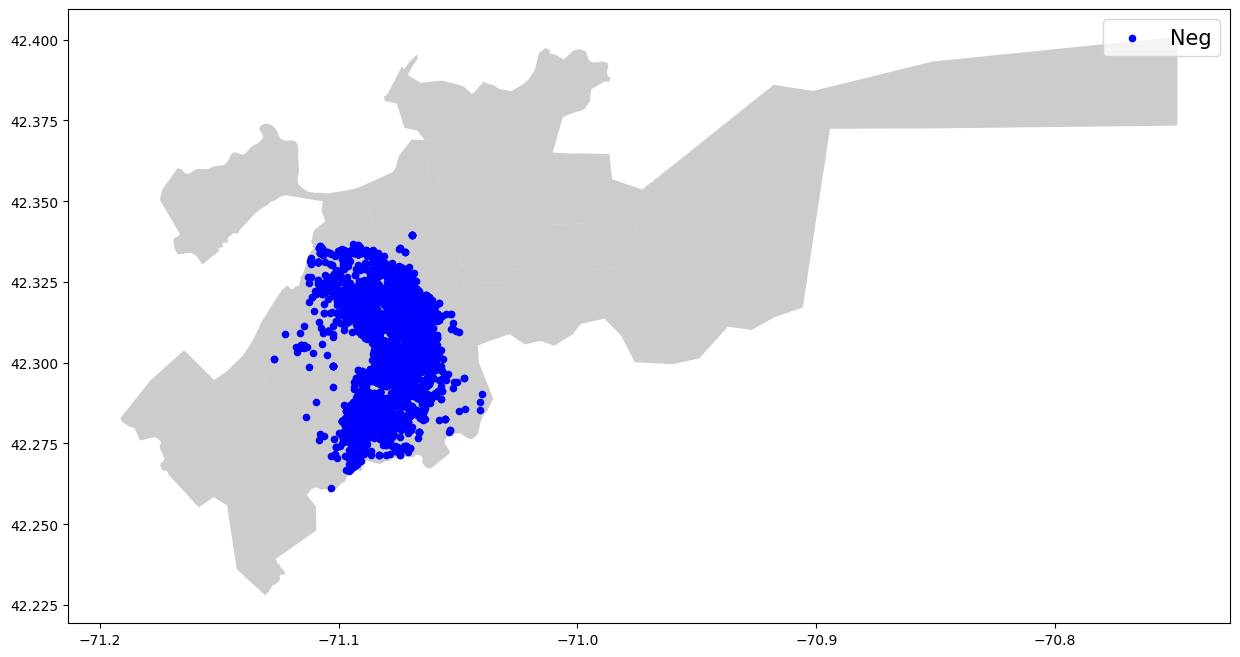

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, 
                                       markersize=20, 
                                       color='blue', 
                                       marker='o', 
                                       label='Neg')
plt.legend(prop={'size':15})

In [11]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import Point

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file("City_Council_Districts_-_Effective_for_the_2023_Municipal_Election/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp")

# Load the crime data into a pandas DataFrame
df = pd.read_csv('CrimeIncidentReports/Combined1.csv')

# Filter the data for active districts and shootings
active_districts_df = df.loc[((df['SHOOTING'] == 1) | (df['SHOOTING'] == 'Y'))]
active_district4_df = df.loc[((df['SHOOTING'] == 1) | (df['SHOOTING'] == 'Y')) & (df['DISTRICT'].isin(['B2', 'B3', 'C11', 'E13']))]
active_district4_df = active_district4_df.dropna(subset=['DISTRICT','Lat','Long'])
# Convert the crime data into a GeoDataFrame with Point geometry
geometry = [Point(xy) for xy in zip(active_district4_df['Long'], active_district4_df['Lat'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(active_district4_df, crs=crs, geometry=geometry)

# Create a map centered on Boston
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

# Add the city council district boundaries to the map
folium.GeoJson(gdf).add_to(m)

# Add the crime incident points to the map as a marker cluster
marker_cluster = MarkerCluster().add_to(m)
for lat, lon, label in zip(geo_df.geometry.y, geo_df.geometry.x, geo_df.OFFENSE_DESCRIPTION):
    folium.Marker(location=[lat, lon], tooltip=label).add_to(marker_cluster)

# Display the map
m


/var/folders/80/yfyy9v2j1y9_hwp_rl0703f40000gn/T/ipykernel_44065/1465942241.py:11: DtypeWarning: Columns (1,3,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CrimeIncidentReports/Combined1.csv')
/opt/anaconda3/envs/CS506/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [17]:
folium.Marker(
    location=[42.341518413993505, -71.04781524567744],
    popup='D street',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.347748158607885, -71.06859857636184],
    popup='Tremont street',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.340562637310484, -71.07123654567745],
    popup='Washington street',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.33379365609151, -71.0570089745134],
    popup='D street and Dorchester Avenue',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.27324720347803, -71.09385001910957],
    popup='Blue Hill Avenue',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.323336554354576, -71.08228916997683],
    popup='Warren street',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.3330087895109, -71.0808374763625],
    popup='Melnea Cass Boulevard',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.33866221205553, -71.09379491684196],
    popup='Huntington Avenue',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.320681958057705, -71.0570222438292],
    popup='Columbia Rd',
    icon=folium.Icon(color='red')
).add_to(m)

folium.Marker(
    location=[42.33517462129237, -71.08853421684212],
    popup='Columbus Avenue',
    icon=folium.Icon(color='red')
).add_to(m)

m